In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [3]:
df = pd.read_csv("numeric_features.csv")

In [4]:
target = 'citations_2024'
features = df.columns.drop(target)

X = df[features]
y = df[target]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
rf_model = RandomForestRegressor(
    n_estimators=200, 
    random_state=42, 
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
xgb_model = XGBRegressor(
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


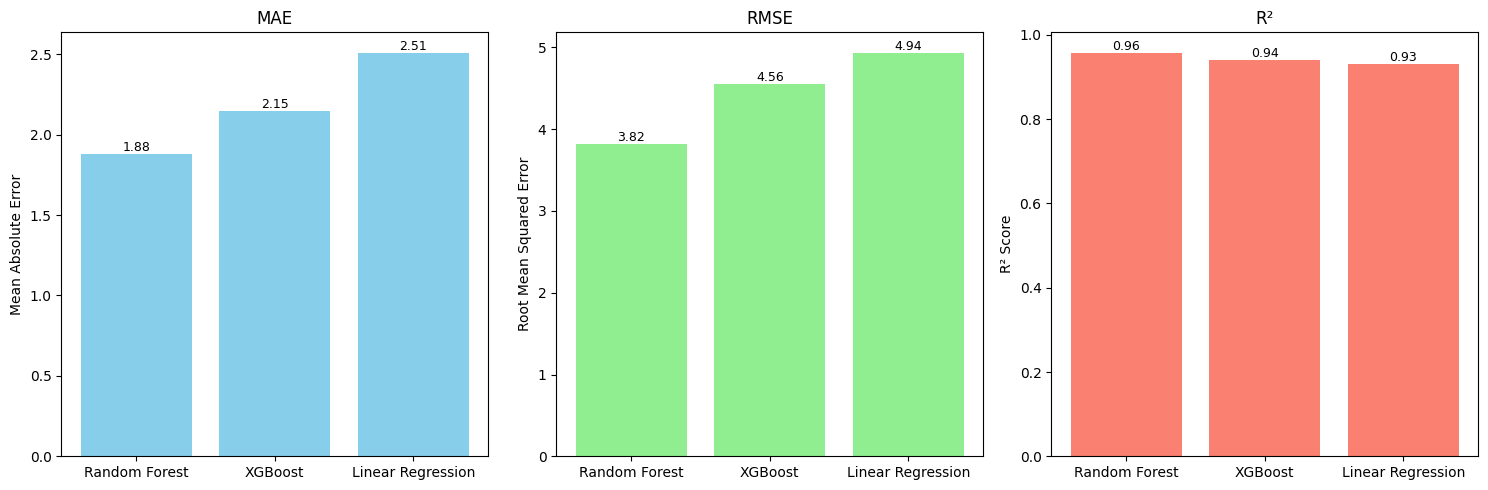

In [11]:
# Compute metrics
metrics = {"Model": [], "MAE": [], "RMSE": [], "R2": []}

models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Linear Regression": lr_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    metrics["Model"].append(name)
    metrics["MAE"].append(mean_absolute_error(y_test, y_pred))
    metrics["RMSE"].append(np.sqrt(mean_squared_error(y_test, y_pred)))
    metrics["R2"].append(r2_score(y_test, y_pred))

# Convert to arrays for plotting
model_names = metrics["Model"]
mae_values = metrics["MAE"]
rmse_values = metrics["RMSE"]
r2_values = metrics["R2"]

# Plot setup
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(model_names, mae_values, color="skyblue")
axes[0].set_title("MAE")
axes[0].set_ylabel("Mean Absolute Error")

axes[1].bar(model_names, rmse_values, color="lightgreen")
axes[1].set_title("RMSE")
axes[1].set_ylabel("Root Mean Squared Error")

axes[2].bar(model_names, r2_values, color="salmon")
axes[2].set_title("R²")
axes[2].set_ylabel("R² Score")

for ax in axes:
    # ax.set_xticklabels(model_names, rotation=20, ha="right")
    for i, v in enumerate(ax.patches):
        ax.text(v.get_x() + v.get_width() / 2, v.get_height(), f"{v.get_height():.2f}", 
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

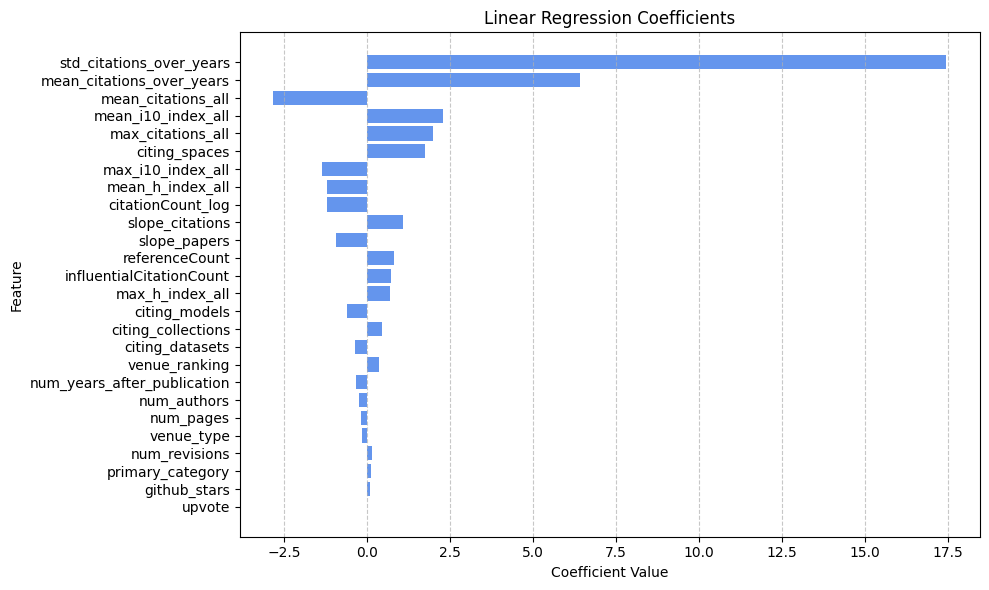

In [12]:
coef = lr_model.coef_

# Sort by absolute value (optional, for clarity)
sorted_idx = np.argsort(np.abs(coef))[::-1]
sorted_features = features[sorted_idx]
sorted_coef = coef[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coef, color='cornflowerblue')
plt.title("Linear Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # largest on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/home/nt-loi/cs313/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


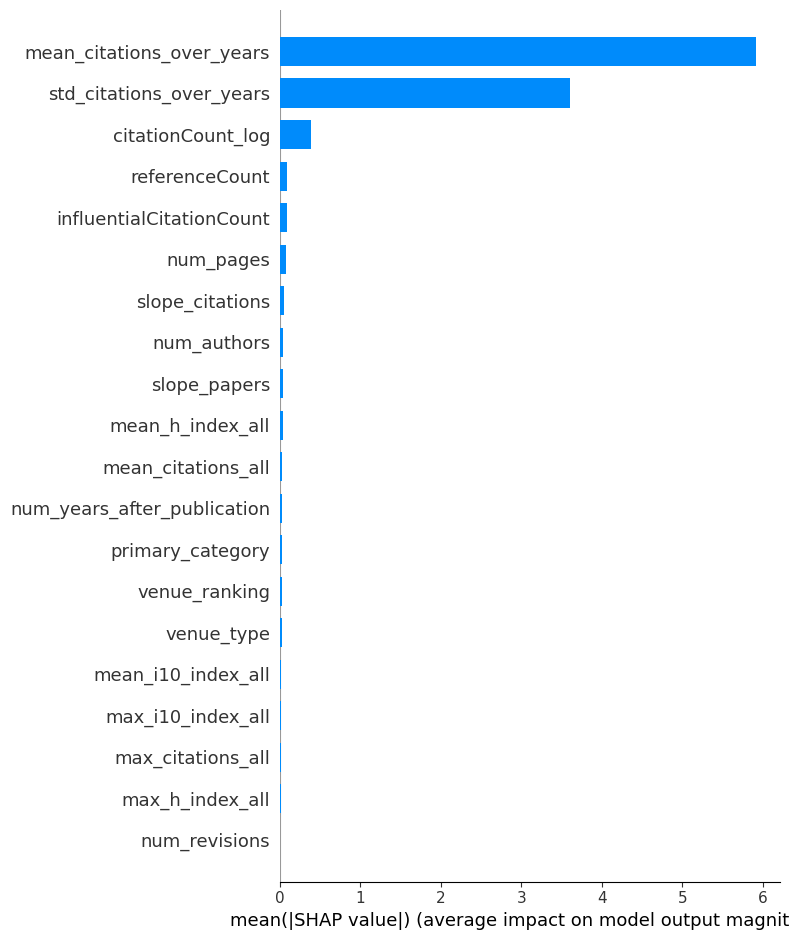

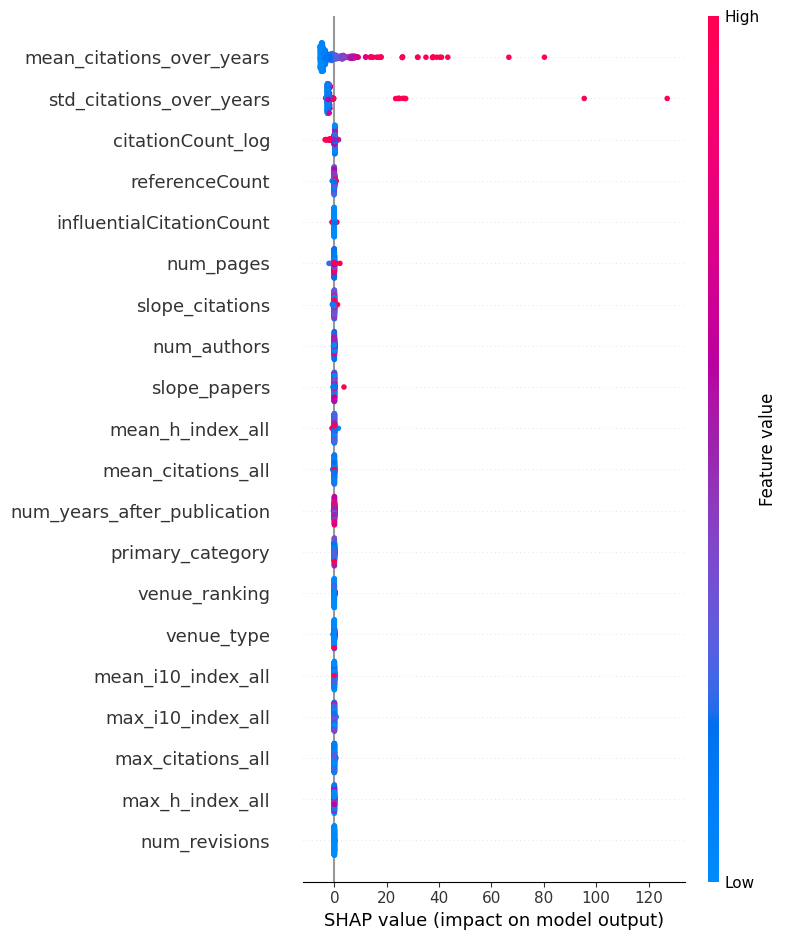

In [13]:
import shap
import matplotlib.pyplot as plt

# Make sure X_test is a DataFrame with column names from 'features'
X_test_df = pd.DataFrame(X_test, columns=features)

# Create SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_df)

# Summary plot (bar type)
shap.summary_plot(shap_values, X_test_df, plot_type="bar")

# Optionally, detailed beeswarm plot
shap.summary_plot(shap_values, X_test_df)
